## **Hyperparameter Tuning & Feature Engineering for NLP Models**

In [85]:
%pip install datasets -q

Note: you may need to restart the kernel to use updated packages.


In [86]:
%pip install nltk -q

Note: you may need to restart the kernel to use updated packages.


In [87]:
from datasets import load_dataset # Load datasets, specifically the IMDb dataset in this case, from the Hugging Face library.
import pandas as pd # Import pandas, a powerful library for data manipulation and analysis.
from sklearn.feature_extraction.text import TfidfVectorizer # Import TF-IDF Vectorizer from Scikit-learn to convert text into numerical features
from sklearn.model_selection import train_test_split # Import train_test_split from Scikit-learn to split data into training and testing sets.
import re # Import the re library to use regular expressions for cleaning and preprocessing text data.
import nltk # Import NLTK (Natural Language Toolkit), a popular library for natural language processing.
nltk.download('punkt') # Download the 'punkt' tokenizer model, which is used to tokenize text into words or sentences.
nltk.download('stopwords') # Download the 'stopwords' corpus, which contains a list of common words (e.g., 'the', 'is', 'and') that are usually removed during text preprocessing as they do not add meaningful information.
nltk.download('punkt_tab') # Download the 'punkt_tab' tokenizer table, which enhances the functionality of 'punkt' by handling abbreviations, punctuation, and complex sentence structures.
from nltk.corpus import stopwords # Import stopwords from NLTK to use the pre-defined list of stopwords in English.
from nltk.tokenize import word_tokenize # Import the word_tokenize function from NLTK, which splits a string of text into individual words (tokens).


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [88]:
dataset = load_dataset('imdb') # Load the IMDb dataset from the Hugging Face library.

In [89]:
sample_size = 500
train_sample = dataset['train'].shuffle(seed=42).select(range(sample_size)) # Select a random sample of 500 reviews from the training set.
test_sample = dataset['test'].shuffle(seed=42).select(range(sample_size))

In [90]:
train_df = pd.DataFrame(train_sample) # Convert the training sample to a pandas DataFrame for easier data manipulation.
test_df = pd.DataFrame(test_sample)

In [91]:
train_df.head() # Display the first few rows of the training DataFrame to visualize the data.

,text,label
0,There is no relation at all between Fortier an...,1
1,This movie is a great. The plot is very true t...,1
2,"George P. Cosmatos' ""Rambo: First Blood Part I...",0
3,In the process of trying to establish the audi...,1
4,"Yeh, I know -- you're quivering with excitemen...",0


In [92]:
train_df.columns = ['review', 'sentiment']
test_df.columns = ['review', 'sentiment']

In [93]:
test_df.head()

,review,sentiment
0,<br /><br />When I unsuspectedly rented A Thou...,1
1,This is the latest entry in the long series of...,1
2,This movie was so frustrating. Everything seem...,0
3,"I was truly and wonderfully surprised at ""O' B...",1
4,This movie spends most of its time preaching t...,0


In [94]:
stop_words = set(stopwords.words('english'))

In [95]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stop_words and len(word) > 1]  # Remove stopwords and short words
    return ' '.join(words)  # Return cleaned text as a string

In [96]:
train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review']= test_df['review'].apply(clean_text)

Apply tfidf 

In [97]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # 5000 most popular words
X_train = tfidf_vectorizer.fit_transform(train_df['clean_review'])
X_test = tfidf_vectorizer.transform(test_df['clean_review'])

In [98]:
X_train.shape

(500, 5000)

500 is the sample, rows
5000 features 

In [99]:
y_train = train_df['sentiment']
y_test = test_df['sentiment']

Supervised learning 

In [100]:
test_df.head()

,review,sentiment,clean_review
0,<br /><br />When I unsuspectedly rented A Thou...,1,br br unsuspectedly rented thousand acres thou...
1,This is the latest entry in the long series of...,1,latest entry long series films french agent os...
2,This movie was so frustrating. Everything seem...,0,movie frustrating everything seemed energetic ...
3,"I was truly and wonderfully surprised at ""O' B...",1,truly wonderfully surprised brother art thou v...
4,This movie spends most of its time preaching t...,0,movie spends time preaching script makes movie...


In [101]:
%pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [108]:
from sklearn.linear_model import LogisticRegression # Import Logistic Regression from Scikit-learn to build a classification model.
from sklearn.model_selection import GridSearchCV # Import GridSearchCV from Scikit-learn to perform hyperparameter tuning using cross-validation.
from sklearn.metrics import classification_report, confusion_matrix #to evaluate the model's performance.
import matplotlib.pyplot as plt # Import matplotlib for data visualization.
import seaborn as sns # Import seaborn for data visualization.  

### Logistic Regression 

📌What is it?

* A linear classifier used for binary or multi-class classification.
* It predicts probabilities and assigns a class based on a threshold (e.g., 0.5).
* Uses the sigmoid function to model relationships between input features and output labels.

📌 Why use it in NLP?

✅ Fast and efficient for text classification (e.g., spam detection, sentiment analysis).

✅ Works well with TF-IDF or Bag-of-Words (BoW) features.

✅ Performs well for linearly separable text data.

In [109]:
logistic_params = {'C': [0.01, 0.1, 1, 10],
                   "solver": ['liblinear']}
logistic_model = LogisticRegression()

logistic_grid = GridSearchCV(estimator = logistic_model,
                             param_grid = logistic_params,
                             cv = 3,
                             scoring = 'accuracy',
                             verbose = 0)
logistic_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
             scoring='accuracy')

To get the best parameters, the best combinations in logistic grid C=10

In [110]:
y_pred_logistic = logistic_grid.best_estimator_.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       254
           1       0.78      0.79      0.78       246

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500



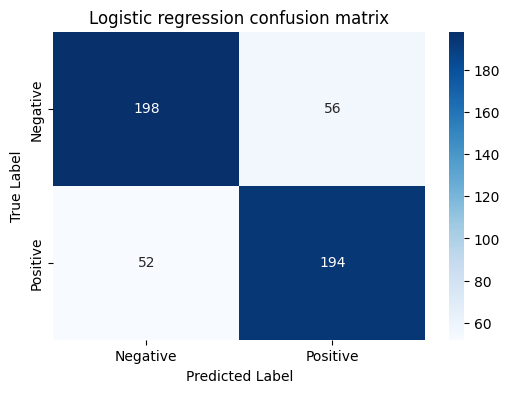

In [112]:
cm = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels = ["Negative",'Positive'],
            yticklabels= ['Negative','Positive'])
plt.title('Logistic regression confusion matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

the 56 negative is false predict and the 52 negative were false predicted as positive

### Suport Vector Classifier (SVC)

📌 What is it?

* A powerful classification model that finds the best decision boundary (hyperplane) between classes.
* Can use different kernels (linear, polynomial, RBF) to separate complex data.
* Works well with high-dimensional data, such as text.

📌 Why use it in NLP?

✅ Works well when text data is not linearly separable (use RBF kernel).

✅ Handles small to medium datasets efficiently.

✅ Used in text categorization, spam detection, and fake news detection.

In [ ]:
from sklearn.svm import SVC

svc_params = {"C": [0.1, 1, 10],
              "kernel": ['linear','rbf']} # The list of kernel functions to be tested.
svc_model = SVC() # Support Vector Classifier

svc_grid = GridSearchCV(estimator = svc_model, # The model to be tuned.
                             param_grid = svc_params, # The hyperparameters to be tuned.
                             cv = 3, # Number of cross-validation folds.
                             scoring = 'accuracy', # The evaluation metric to be used.
                             verbose = 0) # Verbosity level (0 = silent, 1 = progress bar, 2 = one line per fold).
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

in linear regression in te kernel the shape of the boundary that is not necessary linear.

![Screenshot 2025-02-19 at 10.30.00.png](<attachment:Screenshot 2025-02-19 at 10.30.00.png>)
RBF (Radial Basis Function)
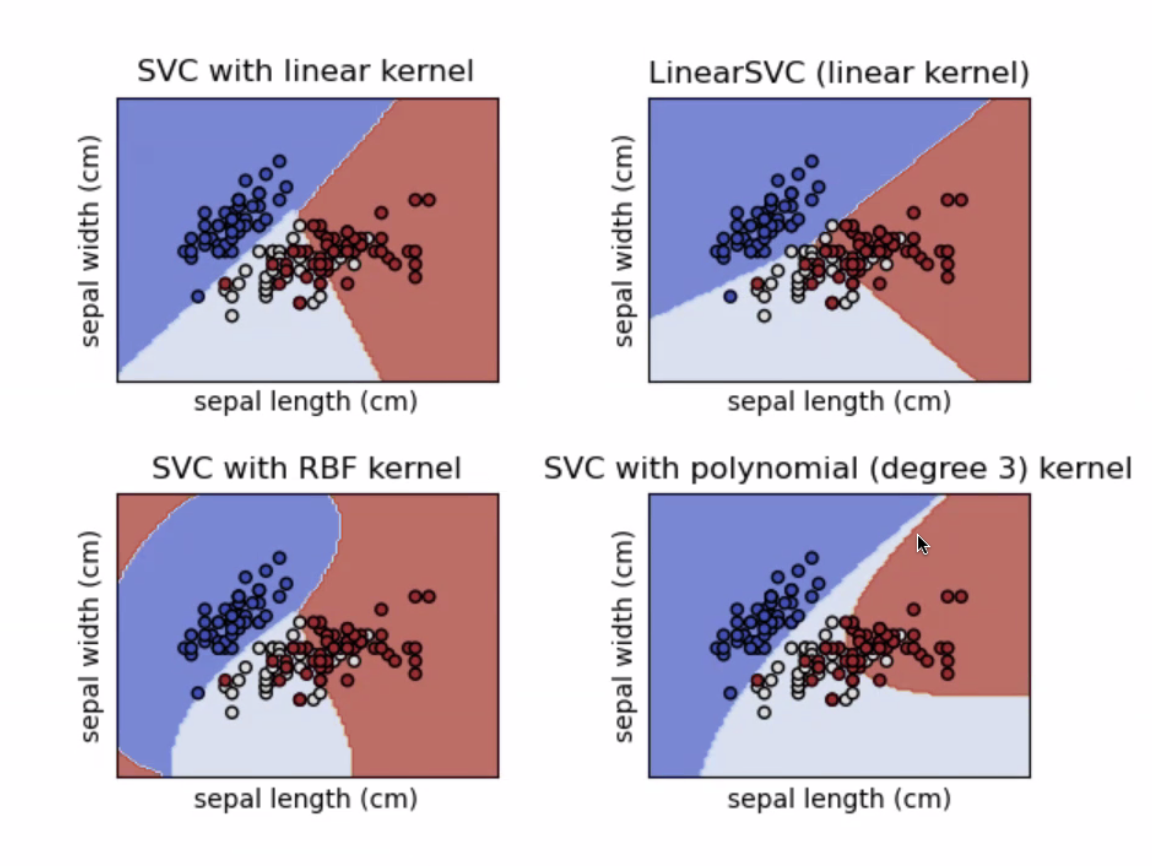

In [50]:
y_pred_svc = svc_grid.best_estimator_.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       254
           1       0.75      0.80      0.77       246

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



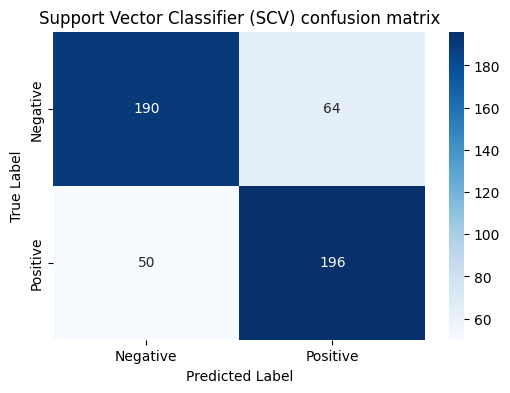

In [83]:
cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels = ["Negative",'Positive'],
            yticklabels= ['Negative','Positive'])
plt.title('Support Vector Classifier (SCV) confusion matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Random Forest Classifier (RFC)

📌 What is it?

* An ensemble learning method that uses multiple decision trees to improve accuracy.
* Combines the predictions of many trees to reduce overfitting.

📌 Why use it in NLP?

✅ Handles imbalanced datasets better than SVM or LR.

✅ Works well with TF-IDF or word embeddings.

✅ Used for document classification, topic modeling, and author identification.

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {"n_estimators": [50, 100, 200],
             "max_depth": [5,10,20]}

rf_model = RandomForestClassifier() 

rf_grid = GridSearchCV(estimator = rf_model, 
                       param_grid = rf_params, 
                       cv = 3, 
                       scoring = 'accuracy', 
                       verbose = 0)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [59]:
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

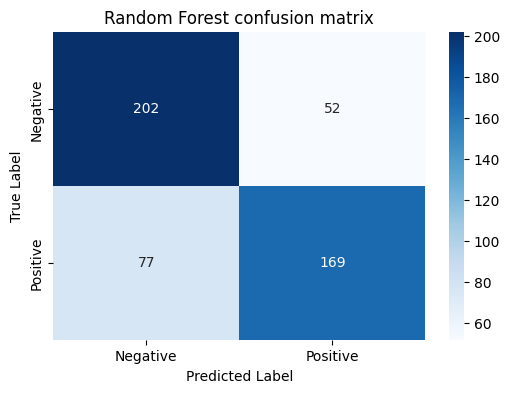

In [60]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels = ["Negative",'Positive'],
            yticklabels= ['Negative','Positive'])
plt.title('Random Forest confusion matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### K-Neighbors Classifier (KNN)

📌 What is it?

* A non-parametric algorithm that assigns a label based on the K nearest neighbors.
* Works well for small datasets but is slow on large datasets.

📌 Why use it in NLP?

✅ Simple and interpretable for text classification.

✅ Used in document similarity, sentiment analysis, and language identification.

✅ Good for small text datasets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors_params = {"n_neighbors": [3, 5, 7, 9],
                    "weights": ['uniform', 'distance']} # The list of weights to be tested.
knn_model = KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_model,
                        param_grid = neighbors_params,
                        cv = 3, # #cross validation we train the portion not the complete set of data
                        scoring = 'accuracy',
                        verbose = 0)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, scoring='accuracy')

In [84]:
knn_grid.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

Text(0.5, 1.0, 'KNN confusion matrix')

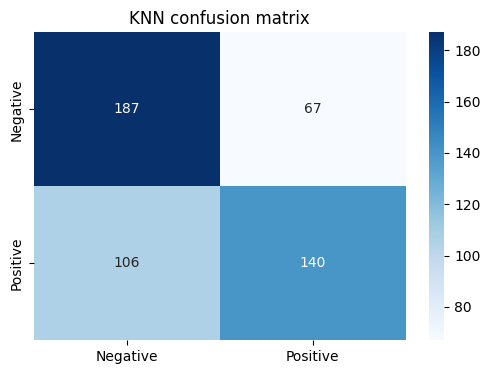

In [68]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels = ["Negative",'Positive'],
            yticklabels= ['Negative','Positive'])
plt.title('KNN confusion matrix')

In [78]:
knn_grid.best_estimator_.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Cross validation (cv):** we split the dataset more than once, usually we use cv with grid search. 

Once we get the best parameters train the model in the whole dataset to look the performance of the model into the whole dataset.

🔹 General Summary
* Use Logistic Regression when the text data is linearly separable and you need a fast, interpretable model.
* Use SVC when text data is complex and high-dimensional and you need a robust classifier.
* Use Random Forest when you want a powerful ensemble model that reduces overfitting.
* Use KNN when you need a simple model for small datasets and document similarity tasks.

Note: Each of these models can be combined with NLP techniques like TF-IDF, Word2Vec, or BERT embeddings to improve performance. 